In [27]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime
import time
import io
import requests
from pytz import timezone
from gpx_converter import Converter
from datetime import timedelta
from datetime import datetime, timezone

from datetime import datetime
from pytz import timezone
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns

import csv
from statistics import mean 
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from tabulate import tabulate

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from functools import reduce

In [28]:
# FUNCTION TO REMOVE TIMEZONE
def remove_timezone(dt):
   
    # HERE `dt` is a python datetime
    # object that used .replace() method
    return dt.replace(tzinfo=None)

def renaming_columns_avg(df1, avg , node_type= 'Bus'):
    
    df1['created_at'] = df1['created_at'].apply(remove_timezone) 
    df1['Date'] = df1['created_at'].dt.date
    df1['Time'] = df1['created_at'].dt.time
    df1.set_index("created_at", inplace = True)
    df1 = df1.resample(avg, label='right', closed='right').mean().round(3)
    df1 = df1.dropna(axis=1, how='all')
    df1 = df1.drop(['entry_id'], axis = 1)

    if node_type == 'Bus':
        df1 = df1.rename(columns = {'field1': 'PM2.5','field2':'PM10','field3':'Temperature','field4':'Rh'})
        df1 = df1[df1['PM10']<1000]
        
        
    elif node_type == 'Inside':
        df1 = df1.rename(columns = {'field1': 'Temperature','field2':'RH','field3':'PM2.5','field4':'PM10',
                                 'field5': 'CO', 'field6':'NO2', 'field7':'NH3'})
        
        
    elif node_type == 'Airveda':
        df1 = df1.rename(columns = {'field1':'AQI','field2': 'PM10','field3':'PM2.5','field4':'CO', 'field5': 'NOX'})
        
    
    return df1

In [29]:
bn1 = pd.read_csv('Node1_Data.csv', parse_dates = ['created_at'])
bn2 = pd.read_csv('Node2_Data.csv', parse_dates = ['created_at'])
bn3 = pd.read_csv('Node3_Data.csv', parse_dates = ['created_at'])
bn4 = pd.read_csv('Node4_Data.csv', parse_dates = ['created_at'])

In [30]:
bn1

created_at  entry_id     field1      field2     field3  \
0    2023-12-21 18:53:06+05:30         1  47.200001  103.199997  25.234222   
1    2023-12-21 18:53:24+05:30         2  48.200001  105.300003  25.275230   
2    2023-12-21 18:53:42+05:30         3  45.099998   97.500000  25.294876   
3    2023-12-21 18:54:00+05:30         4  44.400002   97.199997  25.255585   
4    2023-12-21 18:54:18+05:30         5  45.500000   88.000000  25.239563   
...                        ...       ...        ...         ...        ...   
6970 2023-12-23 05:58:59+05:30      6971  77.699997  105.699997  25.107002   
6971 2023-12-23 05:59:17+05:30      6972  77.099998  102.099998  25.107956   
6972 2023-12-23 05:59:35+05:30      6973  76.099998  100.000000  25.085640   
6973 2023-12-23 05:59:53+05:30      6974  74.000000  100.800003  25.112534   
6974 2023-12-23 06:00:11+05:30      6975  75.599998  104.599998  25.117683   

         field4     field5     field6      field7  field8  latitude  \
0     47.490215  17.445236  78.349678    0.000000    1.93       NaN   
1     47.346592  17.445202  78.349678    0.000000    1.22       NaN   
2     47.263813  17.445433  78.349800    0.000000    2.76       NaN   
3     47.430038  17.445616  78.349915    0.000000    0.26       NaN   
4     47.556877  17.445667  78.349976    0.000000    0.11       NaN   
...         ...        ...        ...         ...     ...       ...   
6970  51.787186  17.445204  78.349770  584.900024    0.04       NaN   
6971  51.814747  17.445238  78.349754  584.900024    0.09       NaN   
6972  51.807308  17.445253  78.349731  584.900024    0.31       NaN   
6973  51.814938  17.445271  78.349731  584.900024    0.02       NaN   
6974  51.792526  17.445238  78.349754  584.900024    0.22       NaN   

      longitude  elevation  status  
0           NaN        NaN     NaN  
1           NaN        NaN     NaN  
2           NaN        NaN     NaN  
3           NaN        NaN     NaN  
4           NaN        NaN     NaN  
...         ...        ...     ...  
6970        NaN        NaN     NaN  
6971        NaN        NaN     NaN  
6972        NaN        NaN     NaN  
6973        NaN        NaN     NaN  
6974        NaN        NaN     NaN  

[6975 rows x 14 columns]

# 1 Min Average

In [31]:
BN1 = renaming_columns_avg(bn1, 'T', 'Bus')
BN2 = renaming_columns_avg(bn2, 'T', 'Bus')
BN3 = renaming_columns_avg(bn3, 'T', 'Bus')
BN4 = renaming_columns_avg(bn4, 'T', 'Bus')

In [32]:
BN1

PM2.5     PM10  Temperature      Rh  field5  field6  \
created_at                                                                  
2023-12-21 18:54:00  46.225  100.800       25.265  47.383  17.445   78.35   
2023-12-21 18:55:00  45.400   91.233       25.283  47.428  17.446   78.35   
2023-12-21 18:56:00  48.967   94.533       25.395  47.430  17.446   78.35   
2023-12-21 18:57:00  48.275  102.550       25.459  46.744  17.446   78.35   
2023-12-21 18:58:00  49.333   96.533       25.499  46.641  17.445   78.35   
...                     ...      ...          ...     ...     ...     ...   
2023-12-23 05:57:00  75.833  101.333       25.115  51.690  17.445   78.35   
2023-12-23 05:58:00  77.700  103.633       25.117  51.755  17.445   78.35   
2023-12-23 05:59:00  75.625  104.075       25.117  51.741  17.445   78.35   
2023-12-23 06:00:00  75.733  100.967       25.102  51.812  17.445   78.35   
2023-12-23 06:01:00  75.600  104.600       25.118  51.793  17.445   78.35   

                     field7  field8  
created_at                           
2023-12-21 18:54:00     0.0   1.542  
2023-12-21 18:55:00     0.0   0.703  
2023-12-21 18:56:00     0.0   1.533  
2023-12-21 18:57:00     0.0   0.510  
2023-12-21 18:58:00     0.0   0.907  
...                     ...     ...  
2023-12-23 05:57:00   584.9   0.217  
2023-12-23 05:58:00   584.9   0.213  
2023-12-23 05:59:00   584.9   0.175  
2023-12-23 06:00:00   584.9   0.140  
2023-12-23 06:01:00   584.9   0.220  

[2105 rows x 8 columns]

In [33]:
BN1 = BN1.drop(['Temperature', 'Rh', 'field5', 'field6', 'field7', 'field8'], axis=1)
BN2 = BN2.drop(['Temperature', 'Rh', 'field5', 'field6', 'field7', 'field8'], axis=1)
BN3 = BN3.drop(['Temperature', 'Rh', 'field5', 'field6', 'field7', 'field8'], axis=1)
BN4 = BN4.drop(['Temperature', 'Rh', 'field5', 'field6', 'field7', 'field8'], axis=1)

In [34]:
BN1

PM2.5     PM10
created_at                          
2023-12-21 18:54:00  46.225  100.800
2023-12-21 18:55:00  45.400   91.233
2023-12-21 18:56:00  48.967   94.533
2023-12-21 18:57:00  48.275  102.550
2023-12-21 18:58:00  49.333   96.533
...                     ...      ...
2023-12-23 05:57:00  75.833  101.333
2023-12-23 05:58:00  77.700  103.633
2023-12-23 05:59:00  75.625  104.075
2023-12-23 06:00:00  75.733  100.967
2023-12-23 06:01:00  75.600  104.600

[2105 rows x 2 columns]

In [35]:

# Create a figure
fig = go.Figure()

# Add scatter traces for each coluBN
fig.add_trace(go.Scatter(x=BN1.index, y=BN1['PM10'], name='BN1'))
fig.add_trace(go.Scatter(x=BN2.index, y=BN2['PM10'], name='BN2'))
fig.add_trace(go.Scatter(x=BN3.index, y=BN3['PM10'], name='BN3'))
fig.add_trace(go.Scatter(x=BN4.index, y=BN4['PM10'], name='BN4'))
# Add more traces for additional coluBNs as needed

# Update layout
fig.update_layout(title='Outdoor Nodes')
fig.update_xaxes(rangeslider_visible=True)
# Show the plot
fig.show()

In [36]:
BN1.to_csv('BN1_1min.csv')
BN2.to_csv('BN2_1min.csv')
BN3.to_csv('BN3_1min.csv')
BN4.to_csv('BN4_1min.csv')

In [37]:
BN1

PM2.5     PM10
created_at                          
2023-12-21 18:54:00  46.225  100.800
2023-12-21 18:55:00  45.400   91.233
2023-12-21 18:56:00  48.967   94.533
2023-12-21 18:57:00  48.275  102.550
2023-12-21 18:58:00  49.333   96.533
...                     ...      ...
2023-12-23 05:57:00  75.833  101.333
2023-12-23 05:58:00  77.700  103.633
2023-12-23 05:59:00  75.625  104.075
2023-12-23 06:00:00  75.733  100.967
2023-12-23 06:01:00  75.600  104.600

[2105 rows x 2 columns]

In [83]:
aero = pd.read_csv("E:\Lab Work\Bus Nodes Calibration\Aero_21_12_23_to_23_12_23_pm.csv")

In [84]:
aero

Date Time   Monitor ID   Location ID   PM10(ppm)   PM2.5(ppm)
0     21-12-2023 18:37            2             1       0.176        0.061
1     21-12-2023 18:38            2             1       0.171        0.061
2     21-12-2023 18:39            2             1       0.176        0.062
3     21-12-2023 18:40            2             1       0.158        0.063
4     21-12-2023 18:41            2             1       0.170        0.061
...                ...          ...           ...         ...          ...
1540  23-12-2023 05:53            2             1       0.202        0.099
1541  23-12-2023 05:54            2             1       0.200        0.103
1542  23-12-2023 05:55            2             1       0.208        0.102
1543  23-12-2023 05:56            2             1       0.205        0.103
1544  23-12-2023 05:57            2             1       0.202        0.102

[1545 rows x 5 columns]

In [85]:
aero = aero.rename(columns = {'Date Time': 'created_at'})
aero['created_at'] = pd.to_datetime(aero['created_at'], dayfirst = True)

In [86]:
aero.dtypes
aero = aero.drop([' Monitor ID', ' Location ID'], axis=1)

In [87]:
aero['PM10_ppb'] = aero[' PM10(ppm)']*1000
aero['PM2.5_ppb'] = aero[' PM2.5(ppm)']*1000

In [88]:
aero

created_at   PM10(ppm)   PM2.5(ppm)  PM10_ppb  PM2.5_ppb
0    2023-12-21 18:37:00       0.176        0.061     176.0       61.0
1    2023-12-21 18:38:00       0.171        0.061     171.0       61.0
2    2023-12-21 18:39:00       0.176        0.062     176.0       62.0
3    2023-12-21 18:40:00       0.158        0.063     158.0       63.0
4    2023-12-21 18:41:00       0.170        0.061     170.0       61.0
...                  ...         ...          ...       ...        ...
1540 2023-12-23 05:53:00       0.202        0.099     202.0       99.0
1541 2023-12-23 05:54:00       0.200        0.103     200.0      103.0
1542 2023-12-23 05:55:00       0.208        0.102     208.0      102.0
1543 2023-12-23 05:56:00       0.205        0.103     205.0      103.0
1544 2023-12-23 05:57:00       0.202        0.102     202.0      102.0

[1545 rows x 5 columns]

In [82]:

# Create a figure
fig = go.Figure()

# Add scatter traces for each coluBN
fig.add_trace(go.Scatter(x=BN1.index, y=BN1['PM10'], name='BN1'))
fig.add_trace(go.Scatter(x=BN2.index, y=BN2['PM10'], name='BN2'))
fig.add_trace(go.Scatter(x=BN3.index, y=BN3['PM10'], name='BN3'))
fig.add_trace(go.Scatter(x=BN4.index, y=BN4['PM10'], name='BN4'))
fig.add_trace(go.Scatter(x=aero['created_at'], y=aero['PM10_ppb'], name='aero'))
# Add more traces for additional coluBNs as needed

# Update layout
fig.update_layout(title='Outdoor Nodes')
fig.update_xaxes(rangeslider_visible=True)
# Show the plot
fig.show()

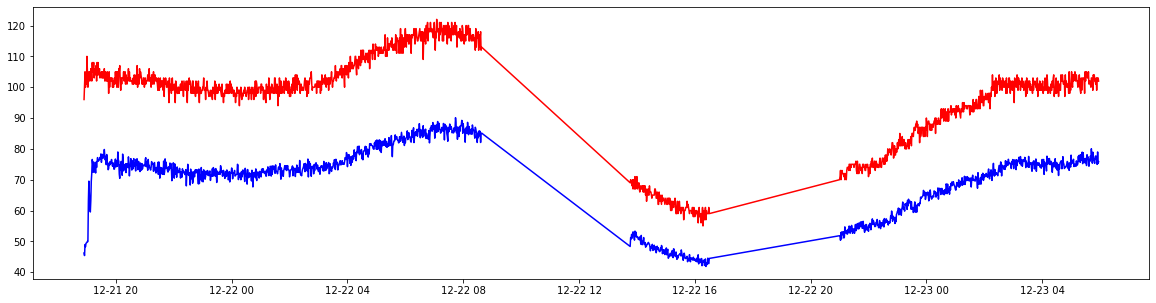

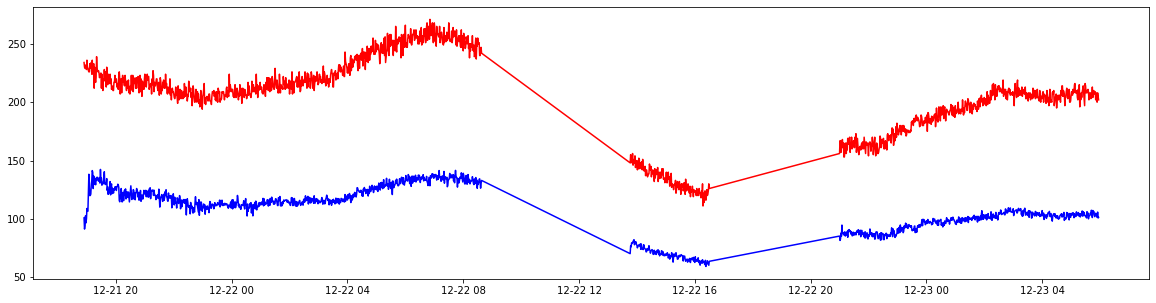

In [44]:
a1 = reduce(lambda x,y: pd.merge(x,y, on='created_at', how='inner'), [aero, BN1])
a1 = a1.dropna()
x = a1['created_at']
y1 = a1['PM2.5_ppb']
y2 = a1['PM2.5']
fig = plt.figure(figsize=(20,5))
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')

x = a1['created_at']
y3 = a1['PM10_ppb']
y4 = a1['PM10']
fig = plt.figure(figsize=(20,5))
plt.plot(x,y3,'r')
plt.plot(x,y4,'b')

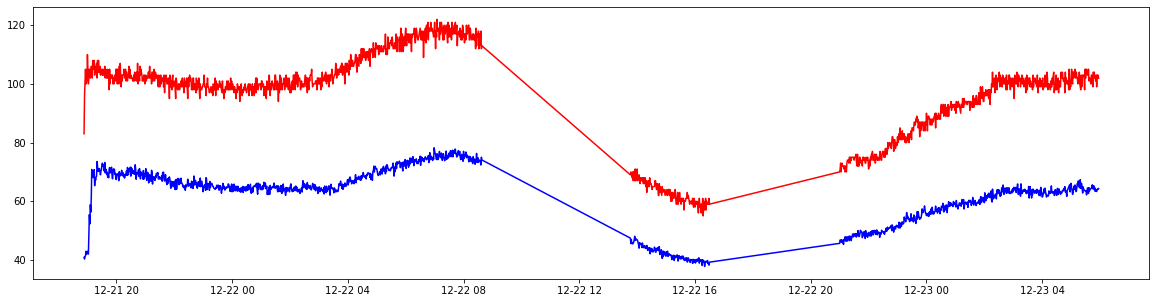

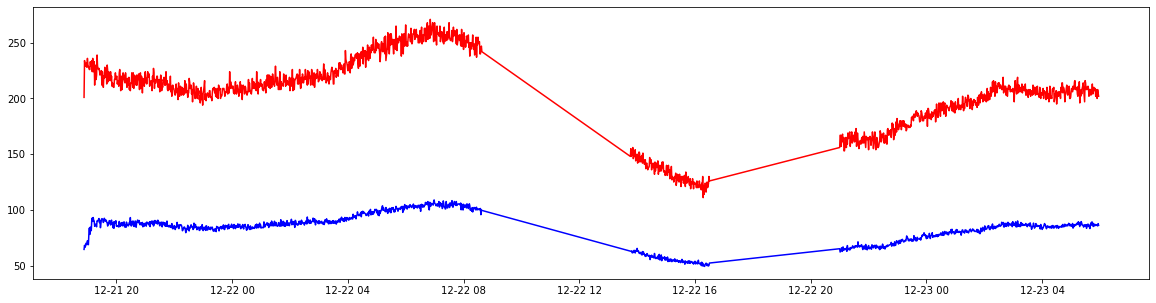

In [45]:
a2 = reduce(lambda x,y: pd.merge(x,y, on='created_at', how='inner'), [aero, BN2])
a2 = a2.dropna()
a2 = a2[a2['PM2.5'] <= 999]
x = a2['created_at']
z1 = a2['PM2.5_ppb']
z2 = a2['PM2.5']
fig = plt.figure(figsize=(20,5))
plt.plot(x,z1,'r')
plt.plot(x,z2,'b')

x = a2['created_at']
z3 = a2['PM10_ppb']
z4 = a2['PM10']
fig = plt.figure(figsize=(20,5))
plt.plot(x,z3,'r')
plt.plot(x,z4,'b')

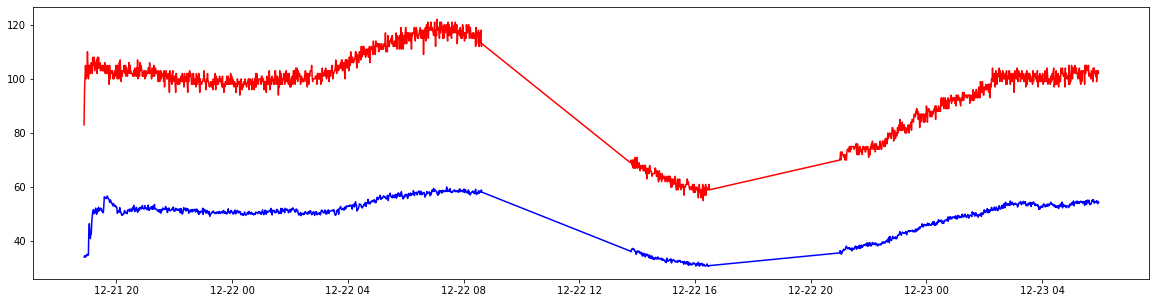

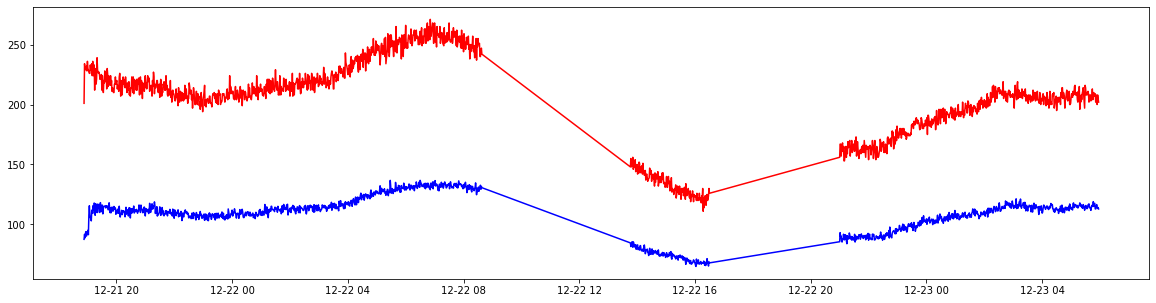

In [46]:
a3 = reduce(lambda x,y: pd.merge(x,y, on='created_at', how='inner'), [aero, BN3])
a3 = a3.dropna()
x = a3['created_at']
c1 = a3['PM2.5_ppb']
c2 = a3['PM2.5']
fig = plt.figure(figsize=(20,5))
plt.plot(x,c1,'r')
plt.plot(x,c2,'b')

x = a3['created_at']
c3 = a3['PM10_ppb']
c4 = a3['PM10']
fig = plt.figure(figsize=(20,5))
plt.plot(x,c3,'r')
plt.plot(x,c4,'b')

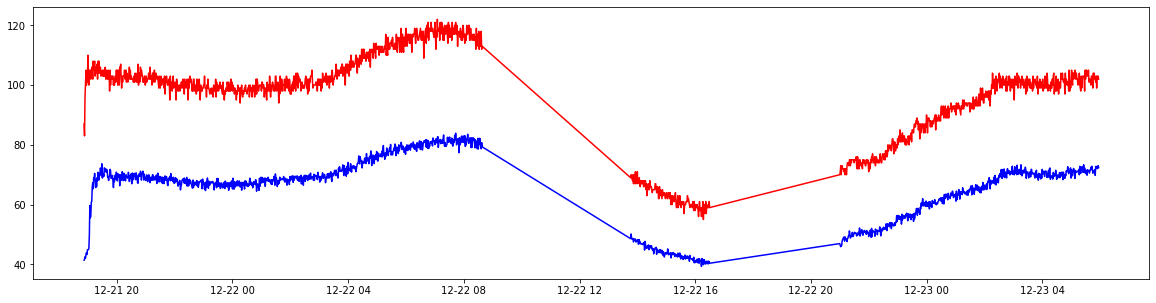

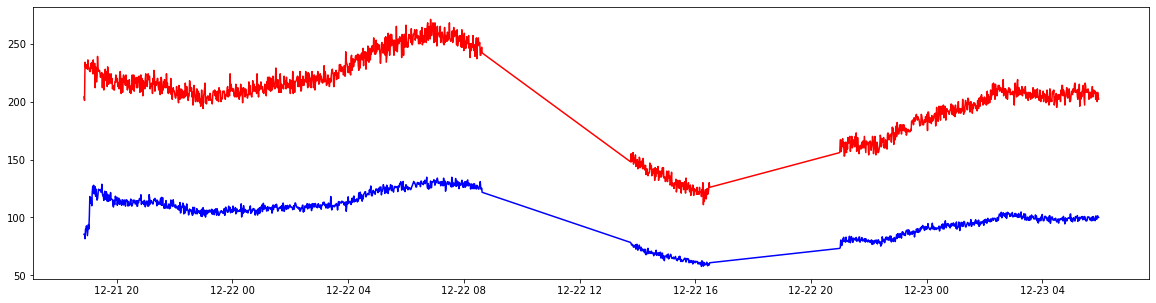

In [47]:
a4 = reduce(lambda x,y: pd.merge(x,y, on='created_at', how='inner'), [aero, BN4])
a4 = a4.dropna()
a4 = a4[a4['PM2.5'] <= 999]
x = a4['created_at']
d1 = a4['PM2.5_ppb']
d2 = a4['PM2.5']
fig = plt.figure(figsize=(20,5))
plt.plot(x,d1,'r')
plt.plot(x,d2,'b')

x = a4['created_at']
d3 = a4['PM10_ppb']
d4 = a4['PM10']
fig = plt.figure(figsize=(20,5))
plt.plot(x,d3,'r')
plt.plot(x,d4,'b')

In [48]:
o = [a1,a2,a3,a4]
y = [y2,z2,c2,d2]
y_ = [y1,z1,c1,d1]
 
npts=[None] * len(o)
lag = []
correlation = []
Node = ['PM2.5_BN1', 'PM2.5_BN2', 'PM2.5_BN3', 'PM2.5_BN4']

for i in range(0, len(o)):
    npts[i] = len(o[i])
    lags = np.arange(-npts[i] + 1, npts[i])
    lag.append(lags)
    ccov = np.correlate(y_[i] - y_[i].mean(), y[i] - y[i].mean(), mode='full')
    ccor = ccov / (npts[i] * y_[i].std() * y[i].std())
    correlation.append(ccor)
    maxlag = lags[np.argmax(ccor)]
    print('*************',Node[i],'***************')
    print("max correlation is at lag %d" % maxlag)
    print("max correlation is ", round(max(ccor),3))
    corr, _ = pearsonr(y[i], y_[i]) 
    print('Pearsons correlation: %.3f' % corr) 
    MSE = mean_squared_error(y[i], y_[i])
    MAE = mean_absolute_error(y[i], y_[i])
    print("MSE PM2.5: ", MSE)
    print("MAE PM2.5: ", MAE)
    print("RMSE PM2.5: ", np.sqrt(mean_squared_error(y[i], y_[i])))

************* PM2.5_BN1 ***************
max correlation is at lag 0
max correlation is  0.965
Pearsons correlation: 0.966
MSE PM2.5:  693.9835247460734
MAE PM2.5:  25.761702879581154
RMSE PM2.5:  26.343567046739768
************* PM2.5_BN2 ***************
max correlation is at lag 0
max correlation is  0.955
Pearsons correlation: 0.956
MSE PM2.5:  1215.0419422838456
MAE PM2.5:  34.16130281229562
RMSE PM2.5:  34.85745174684813
************* PM2.5_BN3 ***************
max correlation is at lag 0
max correlation is  0.957
Pearsons correlation: 0.958
MSE PM2.5:  2270.5462323950296
MAE PM2.5:  46.84524133420536
RMSE PM2.5:  47.650249027628696
************* PM2.5_BN4 ***************
max correlation is at lag 0
max correlation is  0.964
Pearsons correlation: 0.964
MSE PM2.5:  958.0321266699347
MAE PM2.5:  30.38139803921569
RMSE PM2.5:  30.95209405952907


In [49]:
o = [a1,a2,a3,a4]
y = [y3,z3,c3,d3]
y_ = [y4,z4,c4,d4]
 
npts=[None] * len(o)
lag = []
correlation = []
Node = ['PM10_BN1', 'PM10_BN2', 'PM10_BN3', 'PM10_BN4']

for i in range(0, len(o)):
    npts[i] = len(o[i])
    lags = np.arange(-npts[i] + 1, npts[i])
    lag.append(lags)
    ccov = np.correlate(y_[i] - y_[i].mean(), y[i] - y[i].mean(), mode='full')
    ccor = ccov / (npts[i] * y_[i].std() * y[i].std())
    correlation.append(ccor)
    maxlag = lags[np.argmax(ccor)]
    print('*************',Node[i],'***************')
    print("max correlation is at lag %d" % maxlag)
    print("max correlation is ", round(max(ccor),3))
    corr, _ = pearsonr(y[i], y_[i]) 
    print('Pearsons correlation: %.3f' % corr) 
    MSE = mean_squared_error(y[i], y_[i])
    MAE = mean_absolute_error(y[i], y_[i])
    print("MSE PM2.5: ", MSE)
    print("MAE PM2.5: ", MAE)
    print("RMSE PM2.5: ", np.sqrt(mean_squared_error(y[i], y_[i])))

************* PM10_BN1 ***************
max correlation is at lag 0
max correlation is  0.953
Pearsons correlation: 0.953
MSE PM2.5:  9621.13896281021
MAE PM2.5:  96.57612827225132
RMSE PM2.5:  98.08740471034092
************* PM10_BN2 ***************
max correlation is at lag 0
max correlation is  0.97
Pearsons correlation: 0.970
MSE PM2.5:  15050.021747680184
MAE PM2.5:  120.77761347285809
RMSE PM2.5:  122.6785301007482
************* PM10_BN3 ***************
max correlation is at lag 0
max correlation is  0.958
Pearsons correlation: 0.959
MSE PM2.5:  9545.299618679528
MAE PM2.5:  95.75487050359713
RMSE PM2.5:  97.70004922557372
************* PM10_BN4 ***************
max correlation is at lag 0
max correlation is  0.964
Pearsons correlation: 0.965
MSE PM2.5:  10737.128632101307
MAE PM2.5:  102.15440718954248
RMSE PM2.5:  103.620116927657


# Bus Node 1

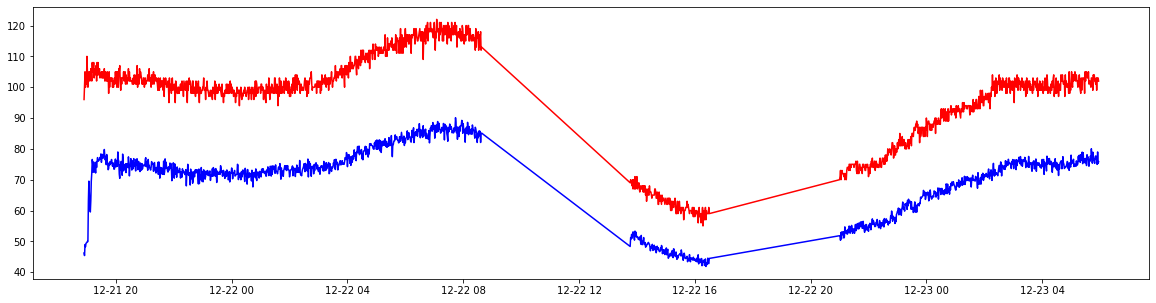

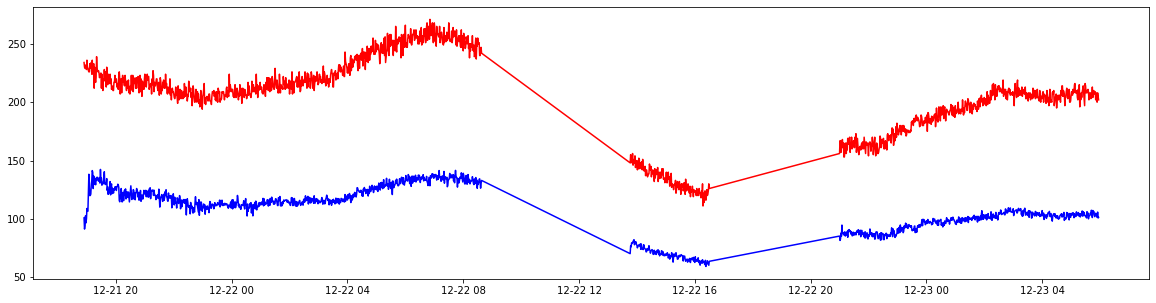

In [50]:
a1 = reduce(lambda x,y: pd.merge(x,y, on='created_at', how='inner'), [aero, BN1])
a1 = a1.dropna()
a1 = a1[a1['PM2.5'] <= 999]
x = a1['created_at']
y1 = a1['PM2.5_ppb']
y2 = a1['PM2.5']
fig = plt.figure(figsize=(20,5))
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')

x = a1['created_at']
y3 = a1['PM10_ppb']
y4 = a1['PM10']
fig = plt.figure(figsize=(20,5))
plt.plot(x,y3,'r')
plt.plot(x,y4,'b')

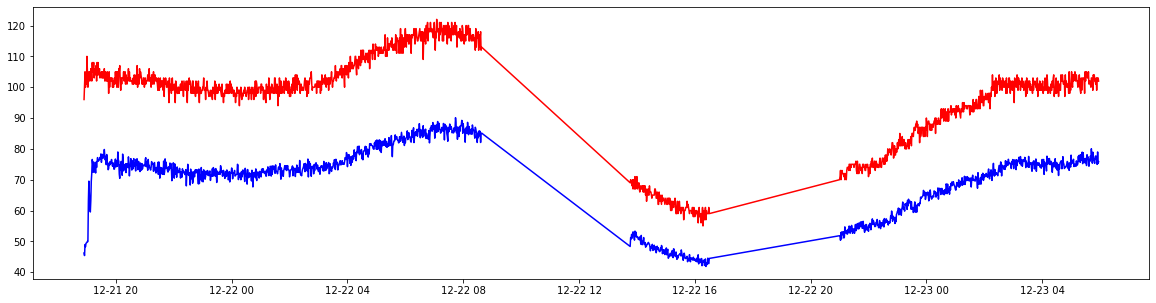

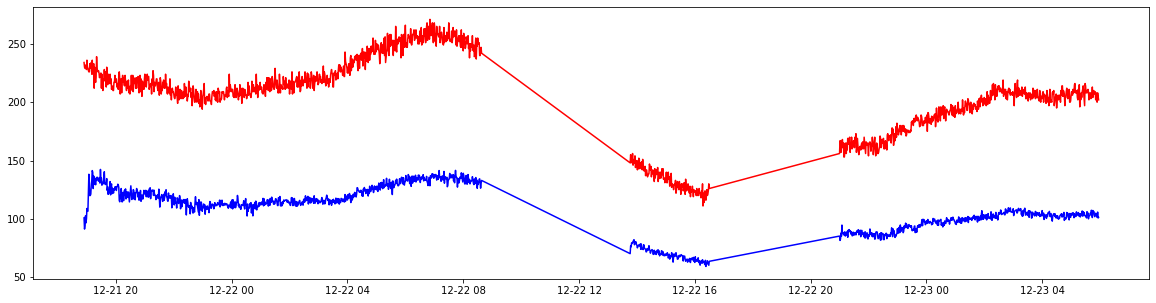

In [52]:
a1['PM2.5_shift'] = a1['PM2.5'].shift(0)
a1['PM10_shift'] = a1['PM10'].shift(0)

a1 = a1.dropna()
x = a1['created_at']
y_1 = a1['PM2.5_ppb']
y_2 = a1['PM2.5_shift']
fig = plt.figure(figsize=(20,5))
plt.plot(x,y_1,'r')
plt.plot(x,y_2,'b')

x = a1['created_at']
y_3 = a1['PM10_ppb']
y_4 = a1['PM10_shift']
fig = plt.figure(figsize=(20,5))
plt.plot(x,y_3,'r')
plt.plot(x,y_4,'b')

In [53]:
npts = len(a1)
lags = np.arange(-npts + 1, npts)
lag.append(lags)
ccov = np.correlate(y_1 - y_1.mean(), y_2 - y_2.mean(), mode='full')
ccor = ccov / (npts * y_1.std() * y_2.std())
correlation.append(ccor)
maxlag = lags[np.argmax(ccor)]
#print('*************',Node[i],'***************')
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_2, y_1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y_2, y_1)
MAE = mean_absolute_error(y_2, y_1)
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(y_2, y_1)))

npts = len(a1)
lags = np.arange(-npts + 1, npts)
lag.append(lags)
ccov = np.correlate(y_3 - y_3.mean(), y_4 - y_4.mean(), mode='full')
ccor = ccov / (npts * y_3.std() * y_4.std())
correlation.append(ccor)
maxlag = lags[np.argmax(ccor)]
#print('*************',Node[i],'***************')
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_4, y_3) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y_4, y_3)
MAE = mean_absolute_error(y_4, y_3)
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(y_4, y_3)))

max correlation is at lag 0
max correlation is  0.965
Pearsons correlation: 0.966
MSE PM2.5:  693.9835247460734
MAE PM2.5:  25.761702879581154
RMSE PM2.5:  26.343567046739768
max correlation is at lag 0
max correlation is  0.953
Pearsons correlation: 0.953
MSE PM10:  9621.13896281021
MAE PM10:  96.57612827225132
RMSE PM10:  98.08740471034092


In [56]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X = a1['PM2.5_shift']
y = a1['PM2.5_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

test_y_hat = regressor.predict(X_test.values.reshape(-1,1)) 
ssr = np.sum((test_y_hat - y_test)**2)
ssr

    #  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
sst

    # R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

    # MAE
print("MAE of simple linear regression of ", metrics.mean_absolute_error(y_test,test_y_hat))

    #MSE
print("MSE of simple linear regression", mean_squared_error(y_test, test_y_hat))

   #RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(y_test, test_y_hat)))

spearman = spearmanr(y_test, test_y_hat)
spearman1 = spearmanr(X_train.values.reshape(-1,1), y_train)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')

    #print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')


Coefficients:  [1.34251743]
Intercept:  1.677714349636858
R2  0.8820426430081241
MAE of simple linear regression of  2.729444065933579
MSE of simple linear regression 26.560838365275625
RMSE of simple linear regression 5.153720827254385
Test data Spearman correlation of simple linear regression: 0.854


In [57]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X = a1['PM10_shift']
y = a1['PM10_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

test_y_hat = regressor.predict(X_test.values.reshape(-1,1)) 
ssr = np.sum((test_y_hat - y_test)**2)
ssr

    #  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
sst

    # R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

    # MAE
print("MAE of simple linear regression of ", metrics.mean_absolute_error(y_test,test_y_hat))

    #MSE
print("MSE of simple linear regression", mean_squared_error(y_test, test_y_hat))

   #RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(y_test, test_y_hat)))

spearman = spearmanr(y_test, test_y_hat)
spearman1 = spearmanr(X_train.values.reshape(-1,1), y_train)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')

    #print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')


Coefficients:  [1.71911605]
Intercept:  19.24293753199271
R2  0.8977407660820577
MAE of simple linear regression of  7.799116112896011
MSE of simple linear regression 112.26237904448185
RMSE of simple linear regression 10.595394237331702
Test data Spearman correlation of simple linear regression: 0.917


# Bus Node 2

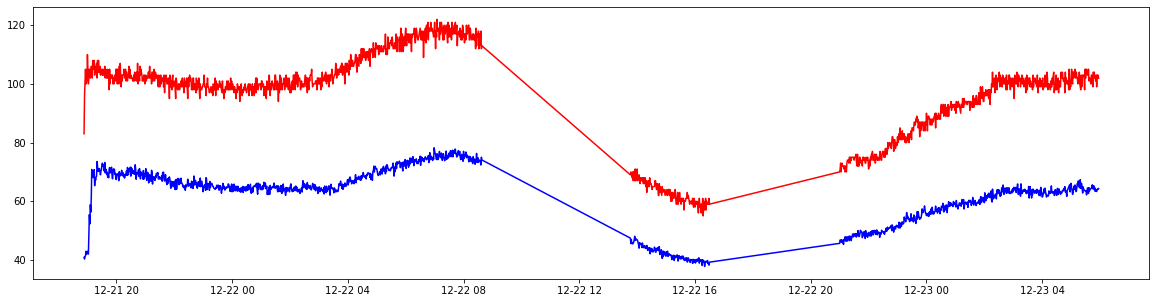

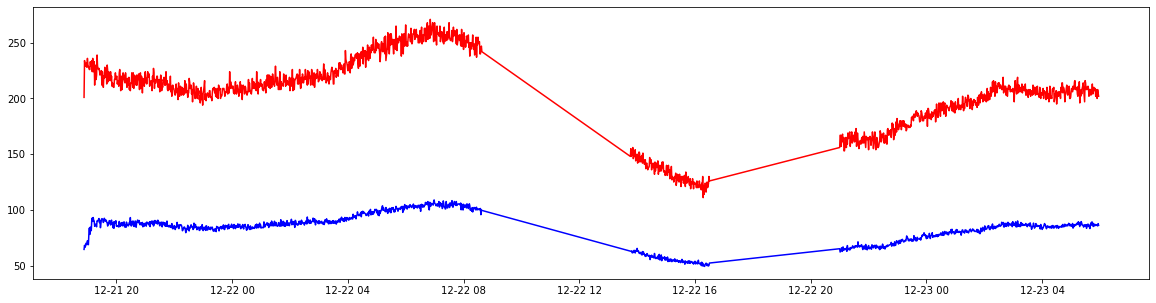

In [58]:
a2 = reduce(lambda x,y: pd.merge(x,y, on='created_at', how='inner'), [aero, BN2])
a2 = a2.dropna()
a2 = a2[a2['PM2.5'] <= 999]
x = a2['created_at']
z1 = a2['PM2.5_ppb']
z2 = a2['PM2.5']
fig = plt.figure(figsize=(20,5))
plt.plot(x,z1,'r')
plt.plot(x,z2,'b')

x = a2['created_at']
z3 = a2['PM10_ppb']
z4 = a2['PM10']
fig = plt.figure(figsize=(20,5))
plt.plot(x,z3,'r')
plt.plot(x,z4,'b')

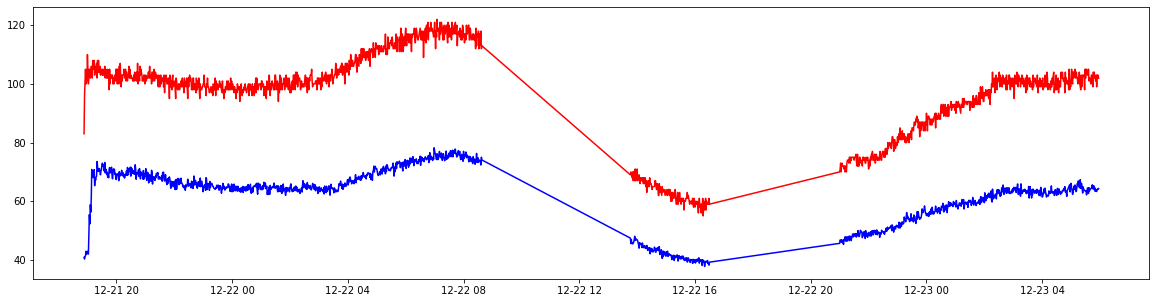

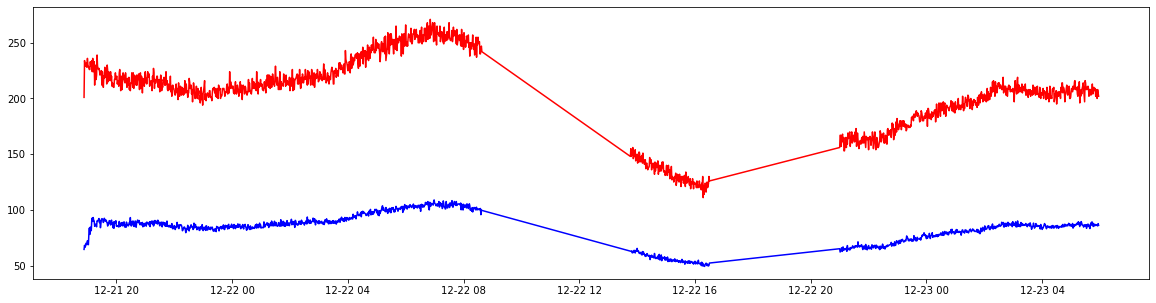

In [59]:
a2['PM2.5_shift'] = a2['PM2.5'].shift(0)
a2['PM10_shift'] = a2['PM10'].shift(0)

a2 = a2.dropna()
x = a2['created_at']
z_1 = a2['PM2.5_ppb']
z_2 = a2['PM2.5_shift']
fig = plt.figure(figsize=(20,5))
plt.plot(x,z_1,'r')
plt.plot(x,z_2,'b')

x = a2['created_at']
z_3 = a2['PM10_ppb']
z_4 = a2['PM10_shift']
fig = plt.figure(figsize=(20,5))
plt.plot(x,z_3,'r')
plt.plot(x,z_4,'b')

In [60]:
npts = len(a2)
lags = np.arange(-npts + 1, npts)
lag.append(lags)
ccov = np.correlate(z_1 - z_1.mean(), z_2 - z_2.mean(), mode='full')
ccor = ccov / (npts * z_1.std() * z_2.std())
correlation.append(ccor)
maxlag = lags[np.argmax(ccor)]
#print('*************',Node[i],'***************')
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(z_2, z_1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(z_2, z_1)
MAE = mean_absolute_error(z_2, z_1)
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(z_2, z_1)))

npts = len(a2)
lags = np.arange(-npts + 1, npts)
lag.append(lags)
ccov = np.correlate(z_3 - z_3.mean(), z_4 - z_4.mean(), mode='full')
ccor = ccov / (npts * z_3.std() * z_4.std())
correlation.append(ccor)
maxlag = lags[np.argmax(ccor)]
#print('*************',Node[i],'***************')
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(z_4, z_3) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(z_4, z_3)
MAE = mean_absolute_error(z_4, z_3)
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(z_4, z_3)))

max correlation is at lag 0
max correlation is  0.955
Pearsons correlation: 0.956
MSE PM2.5:  1215.0419422838456
MAE PM2.5:  34.16130281229562
RMSE PM2.5:  34.85745174684813
max correlation is at lag 0
max correlation is  0.97
Pearsons correlation: 0.970
MSE PM10:  15050.021747680184
MAE PM10:  120.77761347285809
RMSE PM10:  122.6785301007482


In [61]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X = a2['PM2.5_shift']
y = a2['PM2.5_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

test_y_hat = regressor.predict(X_test.values.reshape(-1,1)) 
ssr = np.sum((test_y_hat - y_test)**2)
ssr

    #  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
sst

    # R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

    # MAE
print("MAE of simple linear regression of ", metrics.mean_absolute_error(y_test,test_y_hat))

    #MSE
print("MSE of simple linear regression", mean_squared_error(y_test, test_y_hat))

   #RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(y_test, test_y_hat)))

spearman = spearmanr(y_test, test_y_hat)
spearman1 = spearmanr(X_train.values.reshape(-1,1), y_train)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')

    #print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')


Coefficients:  [1.55370589]
Intercept:  -0.07762064333432761
R2  0.8599111319973893
MAE of simple linear regression of  3.062117736254678
MSE of simple linear regression 31.490709132968632
RMSE of simple linear regression 5.611658322899625
Test data Spearman correlation of simple linear regression: 0.862


In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X = a2['PM10_shift']
y = a2['PM10_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

test_y_hat = regressor.predict(X_test.values.reshape(-1,1)) 
ssr = np.sum((test_y_hat - y_test)**2)
ssr

    #  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
sst

    # R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

    # MAE
print("MAE of simple linear regression of ", metrics.mean_absolute_error(y_test,test_y_hat))

    #MSE
print("MSE of simple linear regression", mean_squared_error(y_test, test_y_hat))

   #RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(y_test, test_y_hat)))

spearman = spearmanr(y_test, test_y_hat)
spearman1 = spearmanr(X_train.values.reshape(-1,1), y_train)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')

    #print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')


Coefficients:  [2.50179891]
Intercept:  -4.240262224735517
R2  0.899575618356449
MAE of simple linear regression of  6.10385008979264
MSE of simple linear regression 109.67702509633169
RMSE of simple linear regression 10.472679938598892
Test data Spearman correlation of simple linear regression: 0.881


# Bus Node 3

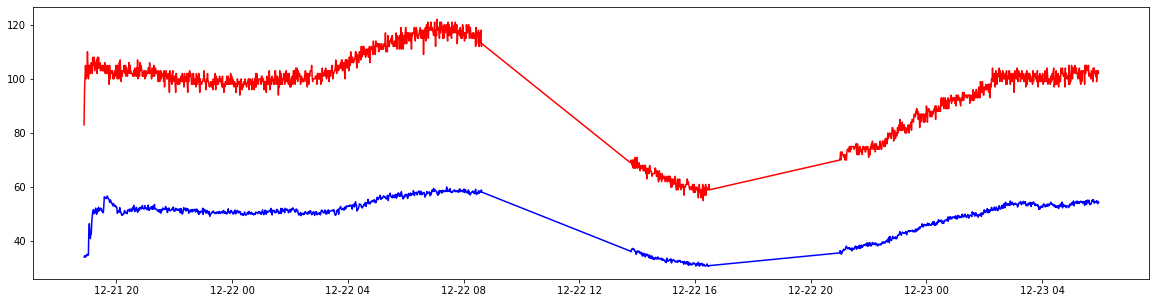

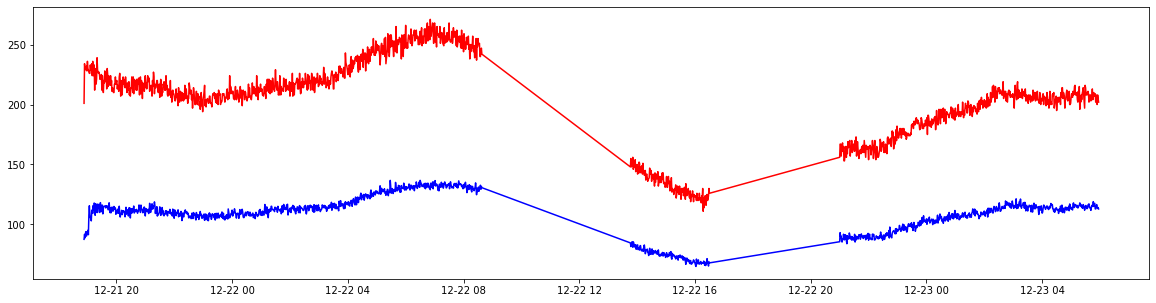

In [63]:
a3 = reduce(lambda x,y: pd.merge(x,y, on='created_at', how='inner'), [aero, BN3])
x = a3['created_at']
c1 = a3['PM2.5_ppb']
c2 = a3['PM2.5']
fig = plt.figure(figsize=(20,5))
plt.plot(x,c1,'r')
plt.plot(x,c2,'b')

x = a3['created_at']
c3 = a3['PM10_ppb']
c4 = a3['PM10']
fig = plt.figure(figsize=(20,5))
plt.plot(x,c3,'r')
plt.plot(x,c4,'b')

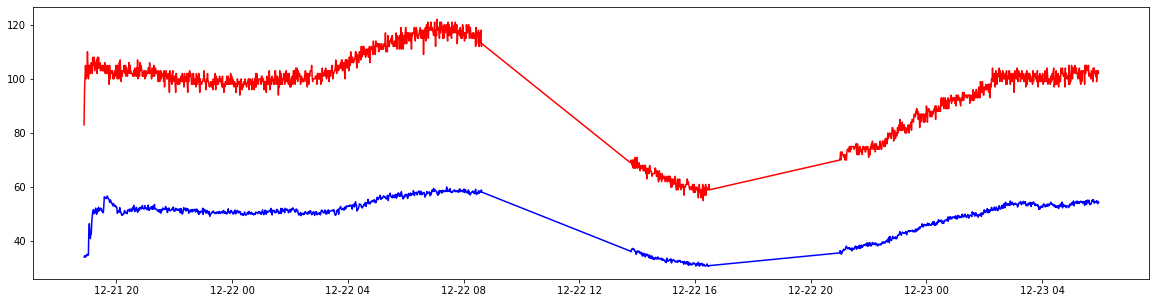

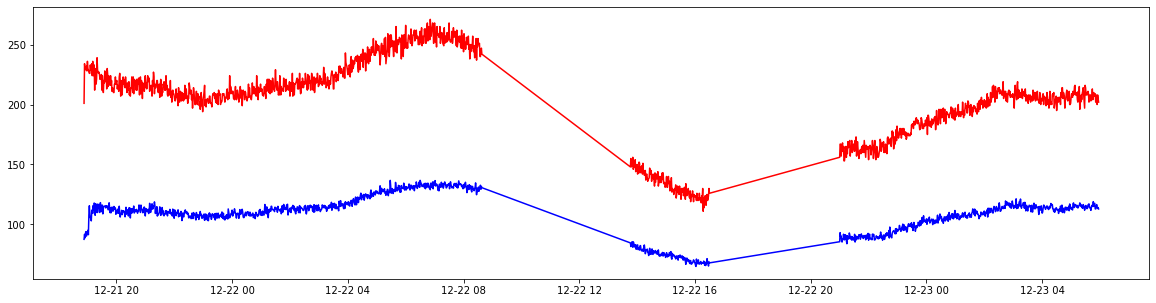

In [64]:
a3['PM2.5_shift'] = a3['PM2.5'].shift(0)
a3['PM10_shift'] = a3['PM10'].shift(0)

a3 = a3.dropna()
x = a3['created_at']
c_1 = a3['PM2.5_ppb']
c_2 = a3['PM2.5_shift']
fig = plt.figure(figsize=(20,5))
plt.plot(x,c_1,'r')
plt.plot(x,c_2,'b')

x = a3['created_at']
c_3 = a3['PM10_ppb']
c_4 = a3['PM10_shift']
fig = plt.figure(figsize=(20,5))
plt.plot(x,c_3,'r')
plt.plot(x,c_4,'b')

In [65]:
npts = len(a3)
lags = np.arange(-npts + 1, npts)
lag.append(lags)
ccov = np.correlate(c_1 - c_1.mean(), c_2 - c_2.mean(), mode='full')
ccor = ccov / (npts * c_1.std() * c_2.std())
correlation.append(ccor)
maxlag = lags[np.argmax(ccor)]
#print('*************',Node[i],'***************')
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(c_2, c_1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(c_2, c_1)
MAE = mean_absolute_error(c_2, c_1)
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(c_2, c_1)))

npts = len(a3)
lags = np.arange(-npts + 1, npts)
lag.append(lags)
ccov = np.correlate(c_3 - c_3.mean(), c_4 - c_4.mean(), mode='full')
ccor = ccov / (npts * c_3.std() * c_4.std())
correlation.append(ccor)
maxlag = lags[np.argmax(ccor)]
#print('*************',Node[i],'***************')
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(c_4, c_3) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(c_4, c_3)
MAE = mean_absolute_error(c_4, c_3)
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(c_4, c_3)))

max correlation is at lag 0
max correlation is  0.957
Pearsons correlation: 0.958
MSE PM2.5:  2270.5462323950296
MAE PM2.5:  46.84524133420536
RMSE PM2.5:  47.650249027628696
max correlation is at lag 0
max correlation is  0.958
Pearsons correlation: 0.959
MSE PM10:  9545.299618679528
MAE PM10:  95.75487050359713
RMSE PM10:  97.70004922557372


In [66]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X = a3['PM2.5_shift']
y = a3['PM2.5_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

test_y_hat = regressor.predict(X_test.values.reshape(-1,1)) 
ssr = np.sum((test_y_hat - y_test)**2)
ssr

    #  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
sst

    # R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

    # MAE
print("MAE of simple linear regression of ", metrics.mean_absolute_error(y_test,test_y_hat))

    #MSE
print("MSE of simple linear regression", mean_squared_error(y_test, test_y_hat))

   #RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(y_test, test_y_hat)))

spearman = spearmanr(y_test, test_y_hat)
spearman1 = spearmanr(X_train.values.reshape(-1,1), y_train)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')

    #print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')


Coefficients:  [2.03021059]
Intercept:  -3.718645279487731
R2  0.863970466957214
MAE of simple linear regression of  3.183010716110121
MSE of simple linear regression 30.578207388070897
RMSE of simple linear regression 5.5297565396743185
Test data Spearman correlation of simple linear regression: 0.849


In [67]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X = a3['PM10_shift']
y = a3['PM10_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

test_y_hat = regressor.predict(X_test.values.reshape(-1,1)) 
ssr = np.sum((test_y_hat - y_test)**2)
ssr

    #  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
sst

    # R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

    # MAE
print("MAE of simple linear regression of ", metrics.mean_absolute_error(y_test,test_y_hat))

    #MSE
print("MSE of simple linear regression", mean_squared_error(y_test, test_y_hat))

   #RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(y_test, test_y_hat)))

spearman = spearmanr(y_test, test_y_hat)
spearman1 = spearmanr(X_train.values.reshape(-1,1), y_train)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')

    #print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')


Coefficients:  [2.05379497]
Intercept:  -18.407975168233634
R2  0.8741102208371665
MAE of simple linear regression of  7.668322165466542
MSE of simple linear regression 137.48868793259243
RMSE of simple linear regression 11.725557041462569
Test data Spearman correlation of simple linear regression: 0.832


# Bus Node 4

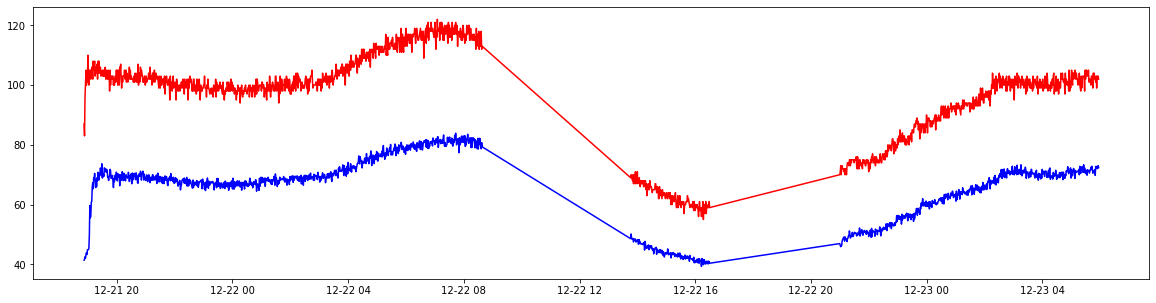

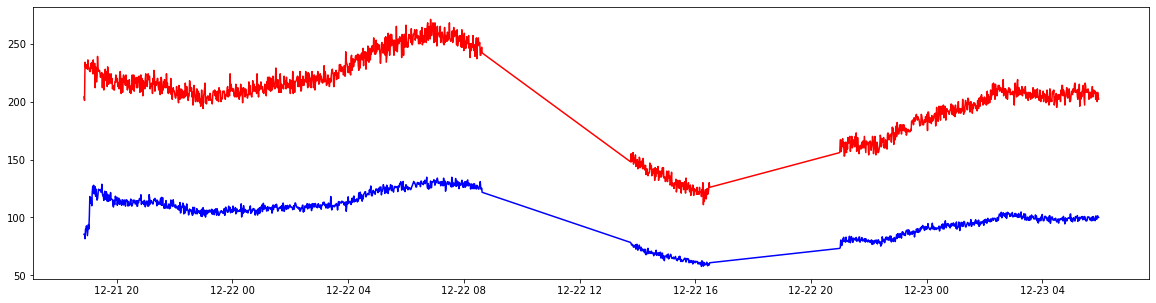

In [68]:
a4 = reduce(lambda x,y: pd.merge(x,y, on='created_at', how='inner'), [aero, BN4])
a4 = a4.dropna()
a4 = a4[a4['PM2.5'] <= 999]
x = a4['created_at']
d1 = a4['PM2.5_ppb']
d2 = a4['PM2.5']
fig = plt.figure(figsize=(20,5))
plt.plot(x,d1,'r')
plt.plot(x,d2,'b')

x = a4['created_at']
d3 = a4['PM10_ppb']
d4 = a4['PM10']
fig = plt.figure(figsize=(20,5))
plt.plot(x,d3,'r')
plt.plot(x,d4,'b')

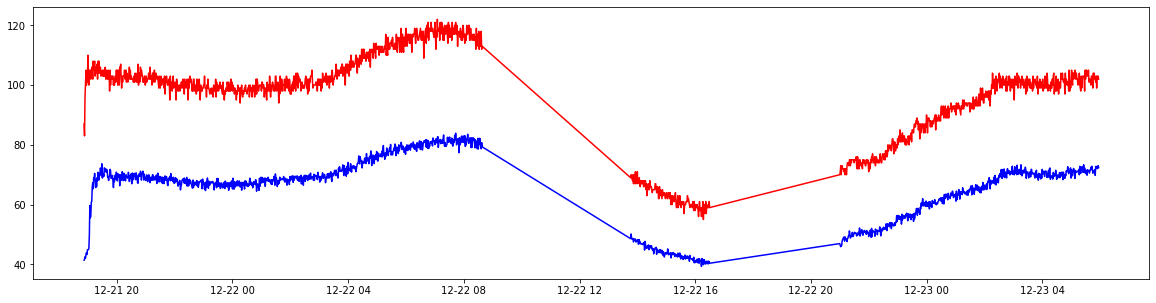

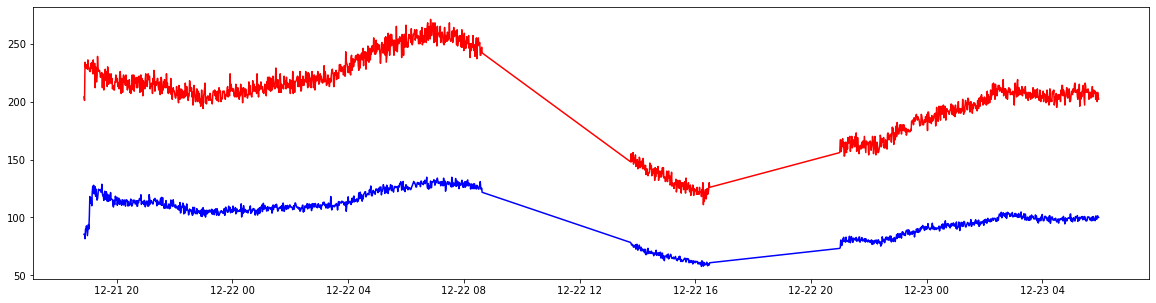

In [69]:
a4['PM2.5_shift'] = a4['PM2.5'].shift(0)
a4['PM10_shift'] = a4['PM10'].shift(0)

a4 = a4.dropna()
x = a4['created_at']
d_1 = a4['PM2.5_ppb']
d_2 = a4['PM2.5_shift']
fig = plt.figure(figsize=(20,5))
plt.plot(x,d_1,'r')
plt.plot(x,d_2,'b')

x = a4['created_at']
d_3 = a4['PM10_ppb']
d_4 = a4['PM10_shift']
fig = plt.figure(figsize=(20,5))
plt.plot(x,d_3,'r')
plt.plot(x,d_4,'b')

In [70]:
npts = len(a4)
lags = np.arange(-npts + 1, npts)
lag.append(lags)
ccov = np.correlate(d_1 - d_1.mean(), d_2 - d_2.mean(), mode='full')
ccor = ccov / (npts * d_1.std() * d_2.std())
correlation.append(ccor)
maxlag = lags[np.argmax(ccor)]
#print('*************',Node[i],'***************')
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(d_2, d_1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(d_2, d_1)
MAE = mean_absolute_error(d_2, d_1)
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(d_2, d_1)))

npts = len(a4)
lags = np.arange(-npts + 1, npts)
lag.append(lags)
ccov = np.correlate(d_3 - d_3.mean(), d_4 - d_4.mean(), mode='full')
ccor = ccov / (npts * d_3.std() * d_4.std())
correlation.append(ccor)
maxlag = lags[np.argmax(ccor)]
#print('*************',Node[i],'***************')
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(d_4, d_3) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(d_4, d_3)
MAE = mean_absolute_error(d_4, d_3)
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(d_4, d_3)))

max correlation is at lag 0
max correlation is  0.964
Pearsons correlation: 0.964
MSE PM2.5:  958.0321266699347
MAE PM2.5:  30.38139803921569
RMSE PM2.5:  30.95209405952907
max correlation is at lag 0
max correlation is  0.964
Pearsons correlation: 0.965
MSE PM10:  10737.128632101307
MAE PM10:  102.15440718954248
RMSE PM10:  103.620116927657


In [71]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X = a4['PM2.5_shift']
y = a4['PM2.5_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

test_y_hat = regressor.predict(X_test.values.reshape(-1,1)) 
ssr = np.sum((test_y_hat - y_test)**2)
ssr

    #  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
sst

    # R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

    # MAE
print("MAE of simple linear regression of ", metrics.mean_absolute_error(y_test,test_y_hat))

    #MSE
print("MSE of simple linear regression", mean_squared_error(y_test, test_y_hat))

   #RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(y_test, test_y_hat)))

spearman = spearmanr(y_test, test_y_hat)
spearman1 = spearmanr(X_train.values.reshape(-1,1), y_train)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')

    #print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')


Coefficients:  [1.40532727]
Intercept:  3.7932384657091234
R2  0.8872349350472235
MAE of simple linear regression of  2.7071649673375924
MSE of simple linear regression 26.998174373433606
RMSE of simple linear regression 5.19597674873874
Test data Spearman correlation of simple linear regression: 0.86


In [72]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X = a4['PM10_shift']
y = a4['PM10_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

test_y_hat = regressor.predict(X_test.values.reshape(-1,1)) 
ssr = np.sum((test_y_hat - y_test)**2)
ssr

    #  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
sst

    # R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

    # MAE
print("MAE of simple linear regression of ", metrics.mean_absolute_error(y_test,test_y_hat))

    #MSE
print("MSE of simple linear regression", mean_squared_error(y_test, test_y_hat))

   #RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(y_test, test_y_hat)))

spearman = spearmanr(y_test, test_y_hat)
spearman1 = spearmanr(X_train.values.reshape(-1,1), y_train)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')

    #print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')


Coefficients:  [1.81454251]
Intercept:  19.1671550154891
R2  0.9178398556395586
MAE of simple linear regression of  7.06133754120121
MSE of simple linear regression 97.03503071867101
RMSE of simple linear regression 9.850636056553455
Test data Spearman correlation of simple linear regression: 0.911


'BN1_1min.csv'

In [78]:
def calculate_values(BN1, BN2, BN3, BN4, m1, c1, m2, c2, m3, c3, m4, c4):
    # Read the input CSV file

    # Calculate the values using the formula y = mx + c
    BN1['PM10_c'] = BN1['PM10'] * m1 + c1
    BN2['PM10_c'] = BN2['PM10'] * m2 + c2
    BN3['PM10_c'] = BN3['PM10'] * m3 + c3
    BN4['PM10_c'] = BN4['PM10'] * m4 + c4


    # Save the updated DataFrame to the output CSV file
    BN1.to_csv('BN1_c.csv', index=False)
    BN2.to_csv('BN2_c.csv', index=False)
    BN3.to_csv('BN3_c.csv', index=False)
    BN4.to_csv('BN4_c.csv', index=False)
    
  
# Example usage
# input_file = 'weather_1min.csv'
BN1 = pd.read_csv('BN1_1min.csv')
BN2 = pd.read_csv('BN2_1min.csv')
BN3 = pd.read_csv('BN3_1min.csv')
BN4 = pd.read_csv('BN4_1min.csv')

m1 = 1.71911605
c1 = 19.24293753
m2 = 2.50179891
c2 = -4.240262225
m3 = 2.05379497
c3 = -18.40797517
m4 = 1.81454251
c4 = 19.16715502

calculate_values(BN1, BN2, BN3, BN4, m1, c1, m2, c2, m3, c3, m4, c4)

In [241]:
MN1_c = pd.read_csv('MN1_c.csv')
MN2_c = pd.read_csv('MN2_c.csv')
MN3_c = pd.read_csv('MN3_c.csv')
MN4_c = pd.read_csv('MN4_c.csv')

# Create a figure
fig = go.Figure()

# Add scatter traces for each column
fig.add_trace(go.Scatter(x=MN1.index, y=MN1_c['PM10_c'], name='MN1'))
fig.add_trace(go.Scatter(x=MN2.index, y=MN2_c['PM10_c'], name='MN2'))
fig.add_trace(go.Scatter(x=MN3.index, y=MN3_c['PM10_c'], name='MN3'))
fig.add_trace(go.Scatter(x=MN4.index, y=MN4_c['PM10_c'], name='MN4'))

# Add more traces for additional columns as needed

# Update layout
fig.update_layout(title='Outdoor Nodes (Calibrated)')
fig.update_xaxes(rangeslider_visible=True)
# Show the plot
fig.show()
fig.write_html("New.html")

In [92]:
BN1 = pd.read_csv('BN1_c.csv')
BN2 = pd.read_csv('BN2_c.csv')
BN3 = pd.read_csv('BN3_c.csv')
BN4 = pd.read_csv('BN4_c.csv')


# Create a figure
fig = go.Figure()

# Add scatter traces for each coluBN
fig.add_trace(go.Scatter(x=BN1['created_at'], y=BN1['PM10_c'], name='BN1'))
fig.add_trace(go.Scatter(x=BN2['created_at'], y=BN2['PM10_c'], name='BN2'))
fig.add_trace(go.Scatter(x=BN3['created_at'], y=BN3['PM10_c'], name='BN3'))
fig.add_trace(go.Scatter(x=BN4['created_at'], y=BN4['PM10_c'], name='BN4'))
fig.add_trace(go.Scatter(x=aero['created_at'], y=aero['PM10_ppb'], name='aero'))
# Add more traces for additional coluBNs as needed

# Update layout
fig.update_layout(title='Outdoor Nodes')
fig.update_xaxes(rangeslider_visible=True)
# Show the plot
fig.show()

In [90]:
BN1

created_at   PM2.5     PM10      PM10_c
0     2023-12-21 18:54:00  46.225  100.800  192.529835
1     2023-12-21 18:55:00  45.400   91.233  176.083052
2     2023-12-21 18:56:00  48.967   94.533  181.756135
3     2023-12-21 18:57:00  48.275  102.550  195.538288
4     2023-12-21 18:58:00  49.333   96.533  185.194367
...                   ...     ...      ...         ...
2100  2023-12-23 05:57:00  75.833  101.333  193.446124
2101  2023-12-23 05:58:00  77.700  103.633  197.400091
2102  2023-12-23 05:59:00  75.625  104.075  198.159940
2103  2023-12-23 06:00:00  75.733  100.967  192.816928
2104  2023-12-23 06:01:00  75.600  104.600  199.062476

[2105 rows x 4 columns]